# CPSC 483 CLASS PROJECT

## Justin Lee
## Linh Nguyen

In [42]:
import matplotlib as mpl
import pandas as pd
import sklearn as skl
import scipy as sp
import numpy as np
# import keras as kr
# import tensorflow as tsf

cdc_data = pd.read_csv("OriginalDataSets/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2022.csv")
cdc_data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1426.0,1491.0,NaN
1,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5641.0,5853.0,NaN
2,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14719.0,15324.0,NaN
3,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,36629.0,38057.0,NaN
4,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,80316.0,83218.0,NaN


In [43]:
us_census_data = pd.read_csv("OriginalDataSets/NST-EST2021-alldata.csv")
us_census_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,NPOPCHG_2020,NPOPCHG_2021,...,NETMIG2020,NETMIG2021,RESIDUAL2020,RESIDUAL2021,RBIRTH2021,RDEATH2021,RNATURALINC2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,10,0,0,0,United States,331449281,331501080,331893745,51799,392665,...,12247,244622,0,0,10.798957,10.352637,0.446319,0.737485,0.000000,0.737485
1,20,1,0,0,Northeast Region,57609148,57525633,57159838,-83515,-365795,...,-79429,-333592,-1024,-1151,9.950554,10.492070,-0.541516,0.977386,-6.794897,-5.817511
2,20,2,0,0,Midwest Region,68985454,68935174,68841444,-50280,-93730,...,-47266,-85268,-718,5156,10.860566,11.058248,-0.197682,0.549222,-1.786994,-1.237772
3,20,3,0,0,South Region,126266107,126409007,127225329,142900,816322,...,134454,770076,528,-3385,11.168835,10.777476,0.391359,0.886268,5.186064,6.072332
4,20,4,0,0,West Region,78588572,78631266,78667134,42694,35868,...,4488,-106594,1214,-620,10.767153,8.947910,1.819243,0.487570,-1.842880,-1.355309


## Data Preprocessing

### *Conditions contributing to Covid-19 deaths data


In [44]:
# We're going to use data by states, so data  that is summed over the nation will be removed
cdc_state = cdc_data[cdc_data['State'] != 'United States']
cdc_state.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,18.0,18.0,NaN
231,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,100.0,105.0,NaN
232,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,228.0,235.0,NaN
233,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,537.0,554.0,NaN
234,10/02/2022,01/01/2020,10/01/2022,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,1159.0,1194.0,NaN


In [45]:
cdc_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463220 entries, 230 to 471959
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          463220 non-null  object 
 1   Start Date          463220 non-null  object 
 2   End Date            463220 non-null  object 
 3   Group               463220 non-null  object 
 4   Year                451030 non-null  float64
 5   Month               414460 non-null  float64
 6   State               463220 non-null  object 
 7   Condition Group     463220 non-null  object 
 8   Condition           463220 non-null  object 
 9   ICD10_codes         463220 non-null  object 
 10  Age Group           463220 non-null  object 
 11  COVID-19 Deaths     329282 non-null  float64
 12  Number of Mentions  333547 non-null  float64
 13  Flag                133938 non-null  object 
dtypes: float64(4), object(10)
memory usage: 53.0+ MB


In [46]:
# Remove unnecessary columns: 'Data As Of', 'Start Date', 'End Date', 'Month', 'ICS10_codes', 'Number of Mentions', 'Flag'
cdc_state1 = cdc_state.copy()
cdc_state1.drop(cdc_state.columns[[0, 1, 2, 4, 5, 9, 12, 13]], axis=1, inplace=True)
cdc_state = cdc_state1.copy()
cdc_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463220 entries, 230 to 471959
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Group            463220 non-null  object 
 1   State            463220 non-null  object 
 2   Condition Group  463220 non-null  object 
 3   Condition        463220 non-null  object 
 4   Age Group        463220 non-null  object 
 5   COVID-19 Deaths  329282 non-null  float64
dtypes: float64(1), object(5)
memory usage: 24.7+ MB


In [47]:
# Keep rows with Group 'By Total'; remove rows that have deaths by month or by year
cdc_state = cdc_state[cdc_state['Group'] == 'By Total']
cdc_state.head()

,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths
230,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,18.0
231,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,100.0
232,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,228.0
233,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,537.0
234,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1159.0


In [48]:
# Drop the Group column
cdc_state = cdc_state.iloc[: , 1:]
cdc_state.head()

,State,Condition Group,Condition,Age Group,COVID-19 Deaths
230,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,18.0
231,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,100.0
232,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,228.0
233,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,537.0
234,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1159.0


### *State population data

In [49]:
state_pop = us_census_data[['NAME', 'POPESTIMATE2021']]
state_pop = state_pop.rename(columns={'NAME': 'State'})
state_pop.head()

,State,POPESTIMATE2021
0,United States,331893745
1,Northeast Region,57159838
2,Midwest Region,68841444
3,South Region,127225329
4,West Region,78667134


### *Merge

In [50]:
# cols = ['', 'title']
cdc_state_merged = cdc_state.join(state_pop.set_index(['State']), on=['State'])
cdc_state = cdc_state_merged.copy()
cdc_state.head()

,State,Condition Group,Condition,Age Group,COVID-19 Deaths,POPESTIMATE2021
230,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,18.0,5039877.0
231,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,100.0,5039877.0
232,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,228.0,5039877.0
233,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,537.0,5039877.0
234,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1159.0,5039877.0


### Transform Data

In [51]:
cdc_state["Covid Death / Population"] = cdc_state["COVID-19 Deaths"] / cdc_state["POPESTIMATE2021"]
cdc_state.head()

,State,Condition Group,Condition,Age Group,COVID-19 Deaths,POPESTIMATE2021,Covid Death / Population
230,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,18.0,5039877.0,0.000004
231,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,100.0,5039877.0,0.000020
232,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,228.0,5039877.0,0.000045
233,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,537.0,5039877.0,0.000107
234,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1159.0,5039877.0,0.000230


### Export data with full feature before applying feature selection

In [52]:
cdc_state.dropna(inplace= True)
cdc_state.to_csv('OutputtedDataSets/full_feature_data.csv')

In [53]:
# Drop 'COVID-19 Deaths', 'POPESTIMATE2021' columns since they're related to the column we just created
our_data = cdc_state.copy()
our_data.drop(cdc_state.columns[[4, 5]], axis=1, inplace=True)
our_data.head()

,State,Condition Group,Condition,Age Group,Covid Death / Population
230,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.000004
231,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,0.000020
232,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,0.000045
233,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,0.000107
234,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,0.000230


In [54]:
our_data.dropna(inplace= True)
our_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 230 to 12419
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     10244 non-null  object 
 1   Condition Group           10244 non-null  object 
 2   Condition                 10244 non-null  object 
 3   Age Group                 10244 non-null  object 
 4   Covid Death / Population  10244 non-null  float64
dtypes: float64(1), object(4)
memory usage: 480.2+ KB


In [55]:
our_data.to_csv('OutputtedDataSets/preprocessed_data.csv')

# Creating four models on the preprocessed dataset

### Load preprocessed data

In [56]:
import matplotlib as mpl
import pandas as pd
import sklearn as skl
import scipy as sp
import numpy as np
import pickle

data = pd.read_csv("OutputtedDataSets/preprocessed_data.csv", index_col=0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 230 to 12419
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     10244 non-null  object 
 1   Condition Group           10244 non-null  object 
 2   Condition                 10244 non-null  object 
 3   Age Group                 10244 non-null  object 
 4   Covid Death / Population  10244 non-null  float64
dtypes: float64(1), object(4)
memory usage: 480.2+ KB


,State,Condition Group,Condition,Age Group,Covid Death / Population
230,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.000004
231,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,0.000020
232,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,0.000045
233,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,0.000107
234,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,0.000230


### Encoding categorical data using LabelEncoder 

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_state = le.fit_transform(np.ravel(data[["State"]]))
le_cond_group = le.fit_transform(np.ravel(data[["Condition Group"]]))
le_cond = le.fit_transform(np.ravel(data[["Condition"]]))
le_age_group = le.fit_transform(np.ravel(data[["Age Group"]]))

In [58]:
numerical_data = pd.DataFrame().assign(death=data['Covid Death / Population'])
numerical_data.insert(0, "State", le_state, True)
numerical_data.insert(1, "Condition Group", le_cond_group, True)
numerical_data.insert(2, "Condition", le_cond, True)
numerical_data.insert(3, "Age Group", le_age_group, True)
numerical_data.info()
numerical_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 230 to 12419
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            10244 non-null  int64  
 1   Condition Group  10244 non-null  int64  
 2   Condition        10244 non-null  int64  
 3   Age Group        10244 non-null  int64  
 4   death            10244 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 480.2 KB


,State,Condition Group,Condition,Age Group,death
230,0,9,11,0,0.000004
231,0,9,11,1,0.000020
232,0,9,11,2,0.000045
233,0,9,11,3,0.000107
234,0,9,11,4,0.000230


## KModes

In [59]:
from kmodes.kmodes import KModes
import pickle
KModesData = numerical_data.copy()

KModesModel = KModes(init='random', n_clusters=5, verbose=3)
KModesModel = KModesModel.fit(KModesData)
filename1 = 'Models/KModes.model'

pickle.dump(KModesModel, open(filename1, 'wb'))
loaded_model1 = pickle.load(open(filename1, 'rb'))

KModesModelResult = KModesModel.fit_predict(KModesData)
KModesData.insert(5, 'Cluster', KModesModelResult, True)
KModesDataSorted = KModesData.sort_values(['Cluster', 'death'])
KModesDataSorted.to_csv("FourModelsOutputs/KModes.csv")

KModesDataSorted.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1952, cost: 37779.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 37892.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1020, cost: 38076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 907, cost: 37879.0
Run 4, iteration: 2/100, moves: 296, cost: 37879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1863, cost: 37247.0
Run 5, iteration: 2/100, moves: 201, cost: 37247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1425, cost: 37325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves

,State,Condition Group,Condition,Age Group,death,Cluster
238,0,9,11,9,0.0,0
240,0,9,7,0,0.0,0
248,0,9,7,9,0.0,0
258,0,9,0,9,0.0,0
268,0,9,20,9,0.0,0


### Analysis

In [60]:
KModesDataSorted['Cluster'].value_counts()

0    4684
4    2122
1    1188
2    1127
3    1123
Name: Cluster, dtype: int64

## DBSCAN Model

In [61]:
from sklearn.cluster import DBSCAN

DBSCANData = numerical_data.copy()
DBSCANModel = DBSCAN(eps=2.5, algorithm='ball_tree', metric='minkowski', leaf_size=2, p=4)
DBSCANModel.fit(DBSCANData)
filename2 = 'Models/DBSCAN.model'

pickle.dump(DBSCANModel, open(filename2, 'wb'))
loaded_model2 = pickle.load(open(filename2, 'rb'))

DBSCANResult = DBSCANModel.fit_predict(DBSCANData)
DBSCANData.insert(5, 'Cluster', DBSCANResult, True)
DBSCANDataSorted = DBSCANData.sort_values(['Cluster', 'death'])

DBSCANDataSorted.to_csv("FourModelsOutputs/DBSCAN.csv")
DBSCANDataSorted.head()

,State,Condition Group,Condition,Age Group,death,Cluster
238,0,9,11,9,0.0,0
468,1,9,11,9,0.0,0
698,2,9,11,9,0.0,0
928,3,9,11,9,0.0,0
1388,5,9,11,9,0.0,0


## Gaussian Mixture Model

In [62]:
from sklearn.mixture import GaussianMixture

GaussianData = numerical_data.copy()
GaussianModel = GaussianMixture(n_components=5)
GaussianModel.fit(GaussianData)
filename3 = 'Models/Gassian.model'

pickle.dump(GaussianModel, open(filename3, 'wb'))
loaded_model3 = pickle.load(open(filename3, 'rb'))

GaussianResult = GaussianModel.fit_predict(GaussianData)
GaussianData.insert(5, 'Cluster', GaussianResult, True)
GaussianDataSorted = GaussianData.sort_values(['Cluster', 'death'])

GaussianDataSorted.to_csv("FourModelsOutputs/Gaussian.csv")
GaussianDataSorted.head()

,State,Condition Group,Condition,Age Group,death,Cluster
368,0,10,21,9,0.0,0
378,0,6,14,9,0.0,0
398,0,7,15,9,0.0,0
410,0,11,22,0,0.0,0
411,0,11,22,1,0.0,0


### Analysis

In [63]:
GaussianDataSorted['Cluster'].value_counts()

4    2979
3    2674
0    2643
1    1498
2     450
Name: Cluster, dtype: int64

## Agglomerative Clustering Model

In [64]:
from sklearn.cluster import AgglomerativeClustering

AgglomerativeData = numerical_data.copy()
AgglomerativeModel = AgglomerativeClustering(n_clusters=5, linkage='ward')
AgglomerativeModel.fit(AgglomerativeData)
filename4 = 'Models/Agglomerative.model'

pickle.dump(AgglomerativeModel, open(filename4, 'wb'))
loaded_model4 = pickle.load(open(filename4, 'rb'))

AgglomerativeResult = AgglomerativeModel.fit_predict(AgglomerativeData)
AgglomerativeData.insert(5, 'Cluster', AgglomerativeResult, True)
AgglomerativeDataSorted = AgglomerativeData.sort_values(['Cluster', 'death'])

AgglomerativeDataSorted.to_csv("FourModelsOutputs/Agglomerative.csv")
AgglomerativeDataSorted.head()

,State,Condition Group,Condition,Age Group,death,Cluster
238,0,9,11,9,0.0,0
240,0,9,7,0,0.0,0
248,0,9,7,9,0.0,0
258,0,9,0,9,0.0,0
268,0,9,20,9,0.0,0


### Analysis

In [65]:
AgglomerativeDataSorted['Cluster'].value_counts()

2    3005
0    2775
1    2177
3    1426
4     861
Name: Cluster, dtype: int64

# Overall Analysis

### Rand Index Confusion Matrix

Rand Index is a metric that computes a similarity measure between two clusters. In a Rand Index Confusion Matrix, Rand Index will be calculated from each pair of models, the higher score the more similar the clusters from those two models are.

In [66]:
from sklearn import metrics

dataSets = {
    "KModes": KModesDataSorted['Cluster'],
    "DBScan": DBSCANDataSorted['Cluster'],
    "Gaussian": GaussianDataSorted['Cluster'],
    "Agglomerative": AgglomerativeDataSorted['Cluster']
}

results = {}
for name1, data1 in dataSets.items():
    array = []
    for name2, data2 in dataSets.items():
        array.append(metrics.rand_score(data1, data2))
    results[name1] = array

matrix1 = pd.DataFrame(results)
matrix1.index = dataSets.keys()
matrix1

,KModes,DBScan,Gaussian,Agglomerative
KModes,1.000000,0.380924,0.800040,0.799763
DBScan,0.380924,1.000000,0.426315,0.444725
Gaussian,0.800040,0.426315,1.000000,0.865711
Agglomerative,0.799763,0.444725,0.865711,1.000000


<Figure size 500x500 with 0 Axes>

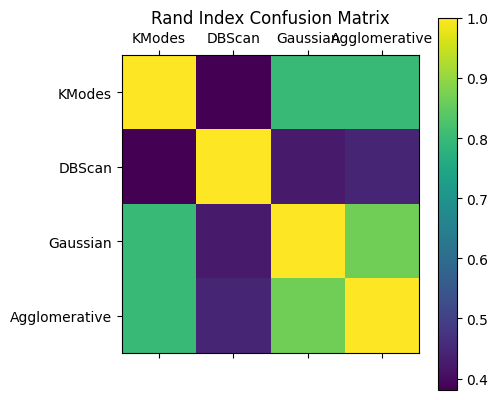

In [67]:
import matplotlib.pyplot as plt1

plt1.figure(figsize=(5, 5))
plt1.matshow(matrix1)
plt1.colorbar()
x_pos = np.arange(len(matrix1.index))
plt1.xticks(x_pos,matrix1.index)
y_pos = np.arange(len(matrix1.index))
plt1.yticks(y_pos,matrix1.index)
plt1.title('Rand Index Confusion Matrix')

plt1.show()

### Mutual Information Based Scores

Mutual Information is another metric that computes a similarity measure between two labels of the same data. Similar to Rand Index Confusion Matrix, in a Mutual Information Confusion Matrix, Mutual Information Score will be calculated from each pair of models, the higher score the more similar the clusters from those two models are.

In [68]:
from sklearn import metrics

dataSets = {
    "KModes": KModesDataSorted['Cluster'],
    "DBScan": DBSCANDataSorted['Cluster'],
    "Gaussian": GaussianDataSorted['Cluster'],
    "Agglomerative": AgglomerativeDataSorted['Cluster']
}

results = {}
for name1, data1 in dataSets.items():
    array = []
    for name2, data2 in dataSets.items():
        array.append(metrics.adjusted_mutual_info_score(data1, data2))
    results[name1] = array

matrix2 = pd.DataFrame(results)
matrix2.index = dataSets.keys()
matrix2

,KModes,DBScan,Gaussian,Agglomerative
KModes,1.000000,0.173213,0.666019,0.657834
DBScan,0.173213,1.000000,0.243126,0.289134
Gaussian,0.666019,0.243126,1.000000,0.714396
Agglomerative,0.657834,0.289134,0.714396,1.000000


<Figure size 500x500 with 0 Axes>

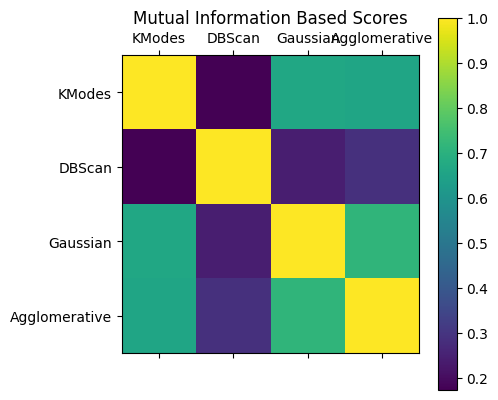

In [69]:
import matplotlib.pyplot as plt2

plt2.figure(figsize=(5, 5))
plt2.matshow(matrix2)
plt2.colorbar()
x_pos = np.arange(len(matrix2.index))
plt2.xticks(x_pos,matrix2.index)
y_pos = np.arange(len(matrix2.index))
plt2.yticks(y_pos,matrix2.index)
plt2.title('Mutual Information Based Scores')

plt2.show()

If we pick 0.5 is the threshold determining the similarity of pairs of cluster of models (>0.5 means similar, <0.5 means dissimilar>), both Rand Index Confusion Matrix and Mutual Information Confusion Matrix have the same result that Gausian, Kmodes and Agglomerative model create clusters that are similar.

### Silhouette Scores

Silhouette Score is the mean of Silhouette Coefficient for all clusters which is calculated using the mean intra-cluster distance and the mean nearest-cluster distance. The score has the range from -1 to 1, the higher score the more distinct and well-defined the clusters are.

In [70]:
silhouette_Kmode = metrics.silhouette_score(KModesData,clusters1)
silhouette_DBSCAN = metrics.silhouette_score(DBSCANData,DBSCANResult)
silhouette_Gaussian = metrics.silhouette_score(GaussianData,GaussianResult)
silhouette_Agglomerative = metrics.silhouette_score(AgglomerativeData,AgglomerativeResult)

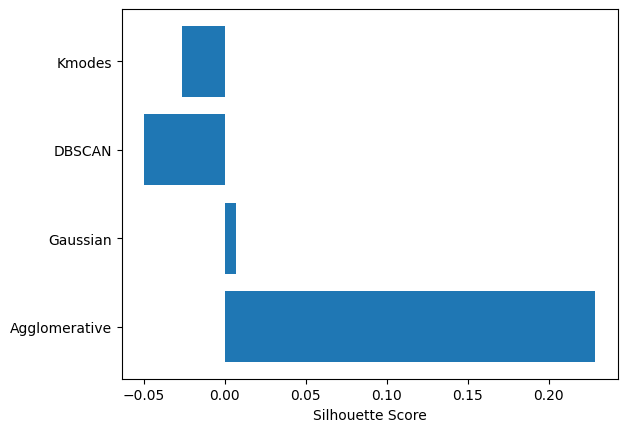

In [71]:
import matplotlib.pyplot as plt3

plt3.rcdefaults()
fig, ax = plt3.subplots()

models = ('Kmodes', 'DBSCAN', 'Gaussian', 'Agglomerative')
y_pos = np.arange(len(models))
silhouette_scores = (silhouette_Kmode, silhouette_DBSCAN, silhouette_Gaussian, silhouette_Agglomerative)

ax.barh(y_pos, silhouette_scores, align='center')
ax.set_yticks(y_pos, labels=models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Silhouette Score')

plt3.show()

The results of Silhouette Score metric demonstrate that Agglomerative model performs the best in grouping the most distinct clusters.

### Calinski-Harabaz Index

Calinski-Harabaz Index is calculated using the between-cluster dispersion and within-cluster dispersion in order to measure the distinctiveness between groups. Similar to Silhouette Score, the higher score the more distinct and well-defined the clusters are.

In [72]:
C_H_Index_Kmode = metrics.calinski_harabasz_score(KModesData,clusters1)
C_H_Index_DBSCAN = metrics.calinski_harabasz_score(DBSCANData,DBSCANResult)
C_H_Index_Gaussian = metrics.calinski_harabasz_score(GaussianData,GaussianResult)
C_H_Index_Agglomerative = metrics.calinski_harabasz_score(AgglomerativeData,AgglomerativeResult)

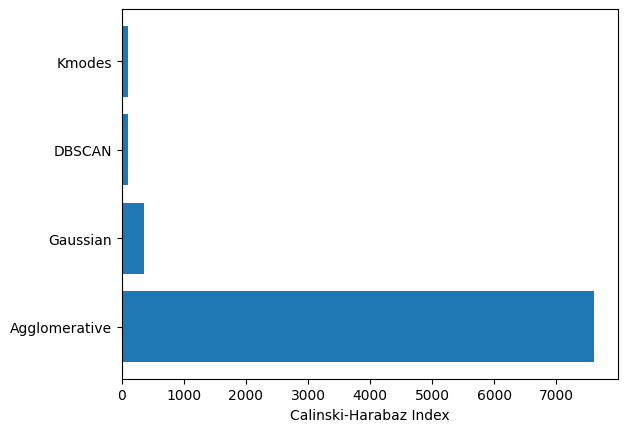

In [73]:
import matplotlib.pyplot as plt4

plt4.rcdefaults()
fig, ax = plt4.subplots()

models = ('Kmodes', 'DBSCAN', 'Gaussian', 'Agglomerative')
y_pos = np.arange(len(models))
C_H_scores = (C_H_Index_Kmode, C_H_Index_DBSCAN, C_H_Index_Gaussian, C_H_Index_Agglomerative)

ax.barh(y_pos, C_H_scores, align='center')
ax.set_yticks(y_pos, labels=models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabaz Index')

plt4.show()

The results of Calinski-Harabaz Index metric demonstrate that Agglomerative model performs the best in grouping the most distinct clusters.

### Model Selection

From four performance metrics above, we can conclude that Agglomerative algorithm performs the best on our data to create 5 clusters that are distinct, and also similar to clusters created by Gaussian and Kmodes model. 